# MSc Thesis - Hugo Stam

### Example 04 - Port System Analysis

<img src="Figures/system_layout_alternative_1B.png" style="width:1000px">
<img src="Figures/system_layout_alternative_2B.png" style="width:1000px">
<img src="Figures/system_layout_alternative_3B.png" style="width:1000px">

In [440]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

#display dfs side by side
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML('<table><tr style="background-color:white;">' + 
                ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) + '</tr></table>')

In [441]:
cmap_tab20c = plt.get_cmap("tab20c")
cmap_tab20 = plt.get_cmap("tab20")
cmap_tab10 = plt.get_cmap("tab10")

pal_sens = cmap_tab20c(np.array([0, 1, 2]))

pal_0 = cmap_tab20c(np.array([1, 5, 9]))

pal_1a = cmap_tab20c(np.array([2, 1, 0]))
pal_2a = cmap_tab20c(np.array([6, 5, 4]))
pal_3a = cmap_tab20c(np.array([10, 9, 8]))

pal_1b = cmap_tab20c(np.array([0, 1, 3]))
pal_2b = cmap_tab20c(np.array([4, 5, 7]))
pal_3b = cmap_tab20c(np.array([8, 9, 11]))

## Load variables

In [442]:
# Alt 1
%store -r PV_alt1_6000_1000000
%store -r PV_alt1_12500_1000000
%store -r PV_alt1_21000_1000000

# Alt 2
%store -r PV_alt2_20_6000_1000000
%store -r PV_alt2_20_12500_1000000
%store -r PV_alt2_20_21000_1000000

%store -r PV_alt2_40_6000_1000000
%store -r PV_alt2_40_12500_1000000
%store -r PV_alt2_40_21000_1000000

%store -r PV_alt2_60_6000_1000000
%store -r PV_alt2_60_12500_1000000
%store -r PV_alt2_60_21000_1000000

# Alt 3
%store -r PV_alt3_20_6000_1000000
%store -r PV_alt3_20_12500_1000000
%store -r PV_alt3_20_21000_1000000

%store -r PV_alt3_40_6000_1000000
%store -r PV_alt3_40_12500_1000000
%store -r PV_alt3_40_21000_1000000

%store -r PV_alt3_60_6000_1000000
%store -r PV_alt3_60_12500_1000000
%store -r PV_alt3_60_21000_1000000

## Create DataFrames

In [443]:
PVs_1 = [["Panamax",     20, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 20, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        20, PV_alt1_21000_1000000, 'Alt1'],
         ["Panamax",     40, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 40, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        40, PV_alt1_21000_1000000, 'Alt1'],
         ["Panamax",     60, PV_alt1_6000_1000000,  'Alt1'], 
         ["New-Panamax", 60, PV_alt1_12500_1000000, 'Alt1'], 
         ["ULCS",        60, PV_alt1_21000_1000000, 'Alt1']]

PVs_2 = [["Panamax",     20, PV_alt2_20_6000_1000000,  'Alt2'], 
         ["New-Panamax", 20, PV_alt2_20_12500_1000000, 'Alt2'], 
         ["ULCS",        20, PV_alt2_20_21000_1000000, 'Alt2'],
         ["Panamax",     40, PV_alt2_40_6000_1000000,  'Alt2'], 
         ["New-Panamax", 40, PV_alt2_40_12500_1000000, 'Alt2'], 
         ["ULCS",        40, PV_alt2_40_21000_1000000, 'Alt2'],
         ["Panamax",     60, PV_alt2_60_6000_1000000,  'Alt2'], 
         ["New-Panamax", 60, PV_alt2_60_12500_1000000, 'Alt2'], 
         ["ULCS",        60, PV_alt2_60_21000_1000000, 'Alt2']]

PVs_3 = [["Panamax",     20, PV_alt3_20_6000_1000000,  'Alt3'], 
         ["New-Panamax", 20, PV_alt3_20_12500_1000000, 'Alt3'], 
         ["ULCS",        20, PV_alt3_20_21000_1000000, 'Alt3'],
         ["Panamax",     40, PV_alt3_40_6000_1000000,  'Alt3'], 
         ["New-Panamax", 40, PV_alt3_40_12500_1000000, 'Alt3'], 
         ["ULCS",        40, PV_alt3_40_21000_1000000, 'Alt3'],
         ["Panamax",     60, PV_alt3_60_6000_1000000,  'Alt3'], 
         ["New-Panamax", 60, PV_alt3_60_12500_1000000, 'Alt3'], 
         ["ULCS",        60, PV_alt3_60_21000_1000000, 'Alt3']]

df_1 = pd.DataFrame(PVs_1,columns=['vessel','distance','PV','Alternative'])
df_1['distance'] = df_1['distance'].astype(float)

df_2 = pd.DataFrame(PVs_2,columns=['vessel','distance','PV','Alternative'])
df_2['distance'] = df_2['distance'].astype(float)

df_3 = pd.DataFrame(PVs_3,columns=['vessel','distance','PV','Alternative'])
df_3['distance'] = df_3['distance'].astype(float)

table_list = [df_1, df_2, df_3]
display(multi_table(table_list))

total_df = pd.concat(table_list)

def scenario_table(df_):
    df = pd.DataFrame(index=['6,000 TEU','12,500 TEU','21,000 TEU'],columns=['20 km', '40 km', '60 km'])
    df.index.name = "Design Vessel"
    df.columns.name = "Offshore Distance"
    df['20 km'] = list(df_.PV[0:3]/10**6)
    df['40 km'] = list(df_.PV[3:6]/10**6)
    df['60 km'] = list(df_.PV[6:9]/10**6)
    df['20 km'] = df['20 km'].map('$ {:,.0f}'.format)
    df['40 km'] = df['40 km'].map('$ {:,.0f}'.format)
    df['60 km'] = df['60 km'].map('$ {:,.0f}'.format)
    return df

df_alt1 = scenario_table(df_1)
df_alt2 = scenario_table(df_2)
df_alt3 = scenario_table(df_3)

table_list = [df_alt1, df_alt2, df_alt3]
# display(multi_table(table_list))

,vessel,distance,PV,Alternative
0,Panamax,20.0,3.741978e+09,Alt1
1,New-Panamax,20.0,4.850424e+09,Alt1
2,ULCS,20.0,5.257784e+09,Alt1
3,Panamax,40.0,3.741978e+09,Alt1
4,New-Panamax,40.0,4.850424e+09,Alt1
5,ULCS,40.0,5.257784e+09,Alt1
6,Panamax,60.0,3.741978e+09,Alt1
7,New-Panamax,60.0,4.850424e+09,Alt1
8,ULCS,60.0,5.257784e+09,Alt1
,vessel,distance,PV,Alternative


In [444]:
def grouped_catplot(alt, data, alpha=0.8):
    plt.figure(figsize=[5,5])

    plot = sns.factorplot(x="distance", y="PV", hue="vessel", col='Alternative', data=data, legend=False,
                       alpha=alpha, palette="tab10")
    
    sns.despine(right=True, top=True)
    plt.xlabel('Offshore distance [km]', fontsize='large')
    plt.ylabel('PV of the costs',        fontsize='large')
    plt.yticks(np.arange(0, 7*10**9, step = 10**9), ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B"])
    plt.legend(loc='best', title='Design vessel', bbox_to_anchor=(1.25, 0.5, 0.5, 0.5), frameon=False, fontsize='large')
    plt.savefig("SaveFigures/PV_catplot_{}.png".format(alt), bbox_inches = 'tight')
    
# grouped_catplot("1", total_df)

<Figure size 360x360 with 0 Axes>

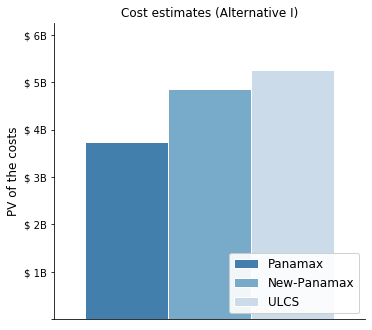

<Figure size 360x360 with 0 Axes>

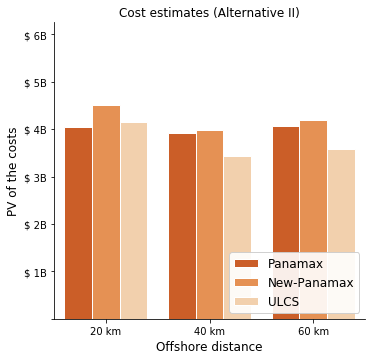

<Figure size 360x360 with 0 Axes>

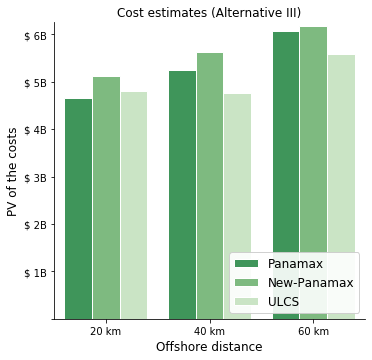

In [445]:
def grouped_barplot(alt, alt_name, data, palette, edge, legend):
    plt.figure(figsize=[5,5])
    sns.factorplot(x="distance", y="PV", hue="vessel", edgecolor=edge, data=data, kind="bar", legend=False, palette=palette)
    sns.despine(right=True, top=True)
    plt.title('Cost estimates (Alternative {})'.format(alt_name), fontsize='large')
    plt.ylabel('PV of the costs', fontsize='large')
    if len(data) == 3:
        plt.xlabel('')
        plt.xticks([], [""])
    else: 
        plt.xlabel('Offshore distance', fontsize='large')
        plt.xticks([0, 1, 2], ["20 km", "40 km", "60 km"])
    plt.yticks(np.arange(0, 7*10**9, step = 10**9), ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B"])
    plt.ylim(0, 6.25*10**9)
    
    if edge == "white" and legend == "inside":
        plt.legend(fontsize='large', loc='lower right', framealpha=0.9, frameon=True)
        plt.savefig("SaveFigures/PV_bar_plot_inlegend_{}.png".format(alt), bbox_inches = 'tight')
    if edge == "white" and legend == "outside":
        plt.legend(title='Design vessel', fontsize='large', title_fontsize='large',
                   bbox_to_anchor=(1., 0.6), frameon=False)
        plt.savefig("SaveFigures/PV_bar_plot_outlegend_{}.png".format(alt), bbox_inches = 'tight')
    
grouped_barplot(1, 'I',   df_1[0:3], pal_1b, 'white', "inside")
grouped_barplot(2, 'II',  df_2,      pal_2b, 'white', "inside")
grouped_barplot(3, 'III', df_3,      pal_3b, 'white', "inside")

In [446]:
def scatter_PV(alt, alt_name, data, palette, style, marker):
  
    plt.figure(figsize=[5,5])
    grid = sns.FacetGrid(data, hue="vessel", palette=palette, height=5)  
    grid.map(plt.plot, "distance", "PV", linestyle=style, marker=marker)
    
    sns.despine(right=True, top=True)
    plt.xlabel('Offshore distance [km]', fontsize='large')
    plt.xticks([20,40,60],["20", "40","60"])

    plt.ylim(2*10**9, 6.25*10**9)
    plt.ylabel('PV of the costs', fontsize='large')
    plt.yticks(np.arange(2*10**9, 7*10**9, step = 10**9), ["$ 2B", "$ 3B","$ 4B", "$ 5B", "$ 6B"])
    
    plt.title('Cost estimates (Alternative {})'.format(alt_name), fontsize='large')
    plt.legend(loc='lower left', title='Design vessel', frameon=False, fontsize='large', title_fontsize='large')
    plt.savefig("SaveFigures/PV_discrete_plot_{}.png".format(alt), bbox_inches = 'tight')

# scatter_PV(1, 'I',   df_1, pal_1a, '-', None)
# scatter_PV(2, 'II',  df_2, pal_2a, '--', 'o')
# scatter_PV(3, 'III', df_3, pal_3a, '--', 'o')

<Figure size 360x360 with 0 Axes>

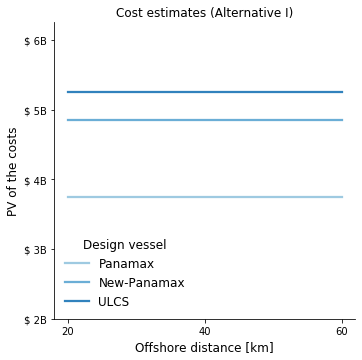

<Figure size 360x360 with 0 Axes>

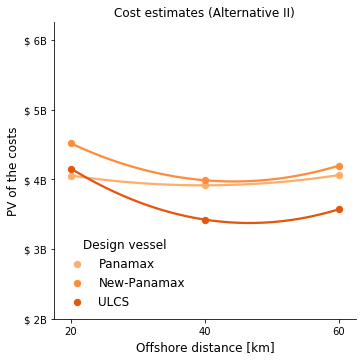

<Figure size 360x360 with 0 Axes>

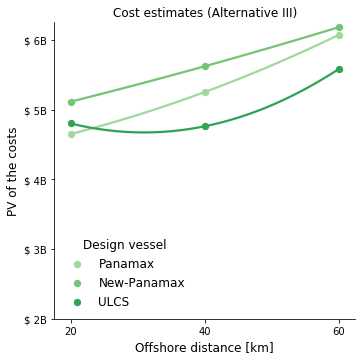

In [448]:
def plot_PV(alt, alt_name, data, palette, scatter, style):
    plt.figure(figsize=[5,5])

    sns.lmplot(x="distance", y="PV", data=data, legend=False, scatter=scatter,
               order=2, truncate=True, palette=palette, hue="vessel", ci=None,
               scatter_kws={"s":40, 'alpha':1})
    
    sns.despine(right=True, top=True)
    
    plt.xlabel('Offshore distance [km]', fontsize='large')
    plt.xticks([20,40,60],["20", "40","60"])

    plt.ylim(2*10**9, 6.25*10**9)
    plt.ylabel('PV of the costs', fontsize='large')
    plt.yticks(np.arange(2*10**9, 7*10**9, step = 10**9), ["$ 2B", "$ 3B","$ 4B", "$ 5B", "$ 6B"])
    
    plt.title('Cost estimates (Alternative {})'.format(alt_name), fontsize='large')
    plt.legend(loc='lower left', title='Design vessel', frameon=False, fontsize='large', title_fontsize='large')
    plt.savefig("SaveFigures/PV_plot_{}.png".format(alt), bbox_inches = 'tight')

def label_point(x, y, val, ax, color):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y']+3*10**8, '$ {:,.1f}B'.format((point['val']/10**9)), color=color)
        
plot_PV(1, 'I', df_1, pal_1a, False, '-')    
# label_point(df_1.distance[6:9], df_1.PV[6:9], df_1.PV[6:9], plt.gca(), 'black') 

plot_PV(2, 'II', df_2, pal_2a, True, '-')    
# label_point(df_2.distance, df_2.PV, df_2.PV, plt.gca(), 'black') 

plot_PV(3, 'III', df_3, pal_3a, True, '-') 
# label_point(df_3.distance, df_3.PV, df_3.PV, plt.gca(), 'black') 

## Sensitivity: Demand

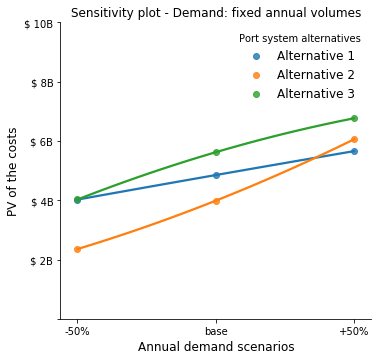

In [449]:
%store -r PV_alt1_12500_250000
%store -r PV_alt1_12500_500000
%store -r PV_alt1_12500_1000000
%store -r PV_alt1_12500_1500000
%store -r PV_alt1_12500_2000000
%store -r PV_alt1_12500_2500000

%store -r PV_alt2_40_12500_250000
%store -r PV_alt2_40_12500_500000
%store -r PV_alt2_40_12500_1000000
%store -r PV_alt2_40_12500_1500000
%store -r PV_alt2_40_12500_2000000
%store -r PV_alt2_40_12500_2500000

%store -r PV_alt3_40_12500_250000
%store -r PV_alt3_40_12500_500000
%store -r PV_alt3_40_12500_1000000
%store -r PV_alt3_40_12500_1500000
%store -r PV_alt3_40_12500_2000000
%store -r PV_alt3_40_12500_2500000

PVs = [['Alternative 1', 500000,  PV_alt1_12500_500000],
       ['Alternative 1', 1000000, PV_alt1_12500_1000000],
       ['Alternative 1', 1500000, PV_alt1_12500_1500000],
       ['Alternative 2', 500000,  PV_alt2_40_12500_500000],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000],
       ['Alternative 2', 1500000, PV_alt2_40_12500_1500000],
       ['Alternative 3', 500000,  PV_alt3_40_12500_500000],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1500000]]

def fixed_demand_plot(df):
    # Create the pandas DataFrame 
    PV_df = pd.DataFrame(df, columns = ['Alternative', 'Demand', 'PV']) 
    PV_df['Demand'] = PV_df['Demand'].astype(float)
    # display(PV_df)

    # sensitivity
    sns.lmplot(x="Demand", y="PV", data=PV_df, legend=False,
               order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

    # labels
    plt.title('Sensitivity plot - Demand: fixed annual volumes', fontsize='large')
    plt.xlabel('Annual demand scenarios', fontsize='large')
    plt.ylabel('PV of the costs', fontsize='large')
    plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')
    
    return PV_df
    
PV_df = fixed_demand_plot(PVs)

# ticks
plt.yticks(np.arange(0, 12*10**9, step = 2*10**9), 
           ["","$ 2B","$ 4B","$ 6B","$ 8B","$ 10B"])
plt.xticks([500000, 1000000, 1500000], 
           ["-50%","base","+50%"])

def demand_scenario_table(df_):
    df = pd.DataFrame(index=["-50%","base","+50%"], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Demand"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:3]/10**6)
    df['Alt 2'] = list(df_.PV[3:6]/10**6)
    df['Alt 3'] = list(df_.PV[6:9]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_demand = demand_scenario_table(PV_df)
# display(df_demand)

# label_point(PV_df.Demand[[1,4,7]], PV_df.PV[[1,4,7]], PV_df.PV[[1,4,7]], plt.gca(), 'black') 

# save fig
if len(PV_df) == 9:
    plt.savefig("SaveFigures/sensitivity_demand_1a.png", bbox_inches = 'tight')

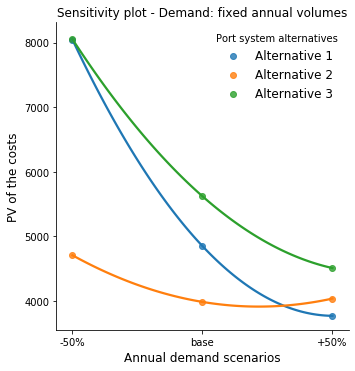

In [395]:
PVs = [['Alternative 1', 500000,  PV_alt1_12500_500000    /500000 ],
       ['Alternative 1', 1000000, PV_alt1_12500_1000000   /1000000],
       ['Alternative 1', 1500000, PV_alt1_12500_1500000   /1500000],
       ['Alternative 2', 500000,  PV_alt2_40_12500_500000 /500000 ],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000/1000000],
       ['Alternative 2', 1500000, PV_alt2_40_12500_1500000/1500000],
       ['Alternative 3', 500000,  PV_alt3_40_12500_500000 /500000 ],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000/1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1500000/1500000]]


# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Demand', 'PV per TEU']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

# sensitivity
sns.lmplot(x="Demand", y="PV per TEU", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

# labels
plt.title('Sensitivity plot - Demand: fixed annual volumes', fontsize='large')
plt.xlabel('Annual demand scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')

# ticks
# plt.yticks(np.arange(0, 12*10**9, step = 2*10**9), 
#            ["","$ 2B","$ 4B","$ 6B","$ 8B","$ 10B"])
plt.xticks([500000, 1000000, 1500000], 
           ["-50%","base","+50%"])

# save fig
if len(PV_df) == 9:
    plt.savefig("SaveFigures/sensitivity_demand_1b.png", bbox_inches = 'tight')

PV [M USD],Alt 1,Alt 2,Alt 3
Demand,,,
-50%,"$ 4,022","$ 2,354","$ 4,026"
base,"$ 4,850","$ 3,987","$ 5,621"
+50%,"$ 5,657","$ 6,058","$ 6,766"
+100%,"$ 6,450","$ 7,431","$ 8,212"


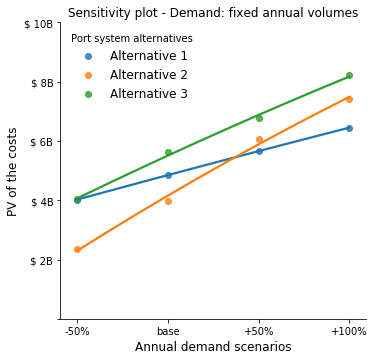

In [11]:
PVs = [['Alternative 1',  500000, PV_alt1_12500_500000],
       ['Alternative 1', 1000000, PV_alt1_12500_1000000],
       ['Alternative 1', 1500000, PV_alt1_12500_1500000],
       ['Alternative 1', 2000000, PV_alt1_12500_2000000],
       ['Alternative 2',  500000, PV_alt2_40_12500_500000],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000],
       ['Alternative 2', 1500000, PV_alt2_40_12500_1500000],
       ['Alternative 2', 2000000, PV_alt2_40_12500_2000000],
       ['Alternative 3',  500000, PV_alt3_40_12500_500000],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1500000], 
       ['Alternative 3', 2000000, PV_alt3_40_12500_2000000]]

# plot
PV_df = fixed_demand_plot(PVs)

# ticks
plt.yticks(np.arange(0, 12*10**9, step = 2*10**9), 
           ["","$ 2B","$ 4B","$ 6B","$ 8B","$ 10B"])
plt.xticks([500_000, 1_000_000, 1_500_000, 2_000_000], 
           ["-50%","base","+50%","+100%"])

def demand_scenario_table(df_):
    df = pd.DataFrame(index=["-50%","base","+50%","+100%"], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Demand"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:4]/10**6)
    df['Alt 2'] = list(df_.PV[4:8]/10**6)
    df['Alt 3'] = list(df_.PV[8:12]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    
    return df

df_demand = demand_scenario_table(PV_df)
display(df_demand)

# save fig
plt.savefig("SaveFigures/sensitivity_demand_2a.png", bbox_inches = 'tight')

,Alternative,Demand,PV per TEU
0,Alternative 1,500000.0,8044.247658
1,Alternative 1,1000000.0,4850.423774
2,Alternative 1,1500000.0,3771.468657
3,Alternative 1,2000000.0,3225.013837
4,Alternative 2,500000.0,4708.601197
5,Alternative 2,1000000.0,3986.828352
6,Alternative 2,1500000.0,4038.722602
7,Alternative 2,2000000.0,3715.711627
8,Alternative 3,500000.0,8051.053740
9,Alternative 3,1000000.0,5621.439999


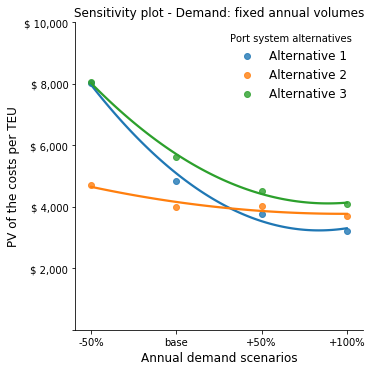

In [12]:
PVs = [['Alternative 1',  500000, PV_alt1_12500_500000    / 500000],
       ['Alternative 1', 1000000, PV_alt1_12500_1000000   /1000000],
       ['Alternative 1', 1500000, PV_alt1_12500_1500000   /1500000],
       ['Alternative 1', 2000000, PV_alt1_12500_2000000   /2000000],
       ['Alternative 2',  500000, PV_alt2_40_12500_500000 / 500000],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000/1000000],
       ['Alternative 2', 1500000, PV_alt2_40_12500_1500000/1500000],
       ['Alternative 2', 2000000, PV_alt2_40_12500_2000000/2000000],
       ['Alternative 3',  500000, PV_alt3_40_12500_500000 / 500000],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000/1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1500000/1500000], 
       ['Alternative 3', 2000000, PV_alt3_40_12500_2000000/2000000]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Demand', 'PV per TEU']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)
display(PV_df)

# sensitivity
sns.lmplot(x="Demand", y="PV per TEU", data=PV_df, legend=False,
           order=2.8, truncate=True, palette="tab10", hue="Alternative", ci=None)

# labels
plt.title('Sensitivity plot - Demand: fixed annual volumes', fontsize='large')
plt.xlabel('Annual demand scenarios', fontsize='large')
plt.ylabel('PV of the costs per TEU', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')

# ticks
plt.yticks(np.arange(0, 12*10**3, step = 2*10**3), 
           ["","$ 2,000","$ 4,000","$ 6,000","$ 8,000","$ 10,000"])
plt.xticks([500_000, 1_000_000, 1_500_000, 2_000_000], 
           ["-50%","base","+50%","+100%"])

# save fig
plt.savefig("SaveFigures/sensitivity_demand_2b.png", bbox_inches = 'tight')

## Sensitivity: Growing demand

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
--,"$ 4,850","$ 3,987","$ 5,621"
low,"$ 5,166","$ 4,845","$ 5,905"
base,"$ 5,534","$ 5,677","$ 6,569"
high,"$ 5,949","$ 6,595","$ 7,348"


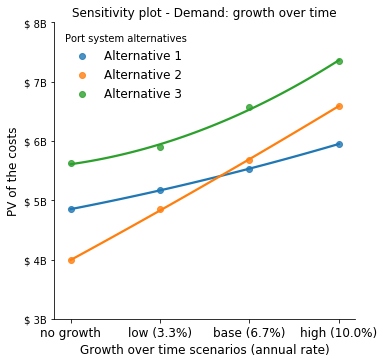

In [13]:
%store -r PV_alt1_12500_1000000_growth0
%store -r PV_alt1_12500_1000000_growth1
%store -r PV_alt1_12500_1000000_growth2
%store -r PV_alt1_12500_1000000_growth3

%store -r PV_alt2_40_12500_1000000_growth0
%store -r PV_alt2_40_12500_1000000_growth1
%store -r PV_alt2_40_12500_1000000_growth2
%store -r PV_alt2_40_12500_1000000_growth3

%store -r PV_alt3_40_12500_1000000_growth0
%store -r PV_alt3_40_12500_1000000_growth1
%store -r PV_alt3_40_12500_1000000_growth2
%store -r PV_alt3_40_12500_1000000_growth3

PVs = [['Alternative 1', 1000000, PV_alt1_12500_1000000_growth0], 
       ['Alternative 1', 1500000, PV_alt1_12500_1000000_growth1], 
       ['Alternative 1', 2000000, PV_alt1_12500_1000000_growth2],
       ['Alternative 1', 2500000, PV_alt1_12500_1000000_growth3],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000_growth0], 
       ['Alternative 2', 1500000, PV_alt2_40_12500_1000000_growth1], 
       ['Alternative 2', 2000000, PV_alt2_40_12500_1000000_growth2],
       ['Alternative 2', 2500000, PV_alt2_40_12500_1000000_growth3],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000_growth0], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1000000_growth1], 
       ['Alternative 3', 2000000, PV_alt3_40_12500_1000000_growth2],
       ['Alternative 3', 2500000, PV_alt3_40_12500_1000000_growth3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative','Demand', 'PV']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

# plot
sns.lmplot(x="Demand", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)  # confidence interval

plt.title('Sensitivity plot - Demand: growth over time', fontsize='large')
plt.xlabel('Growth over time scenarios (annual rate)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')
# label_point(PV_df.Demand, PV_df.PV, PV_df.PV, plt.gca(), 'black') 

plt.yticks(np.arange(3*10**9, 9*10**9, step = 10**9), 
           ["$ 3B","$ 4B","$ 5B","$ 6B","$ 7B","$ 8B"])
plt.xticks([1000000, 1500000, 2000000, 2500000], 
           ["no growth", "low (3.3%)", "base (6.7%)", "high (10.0%)"], size='large')

def growth_scenario_table(df_):
    df = pd.DataFrame(index=['--', 'low', 'base', 'high'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:4]/10**6)
    df['Alt 2'] = list(df_.PV[4:8]/10**6)
    df['Alt 3'] = list(df_.PV[8:12]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_growth_demand = growth_scenario_table(PV_df)
display(df_growth_demand)

# save fig
plt.savefig("SaveFigures/sensitivity_demand_growth_1.png", bbox_inches = 'tight')

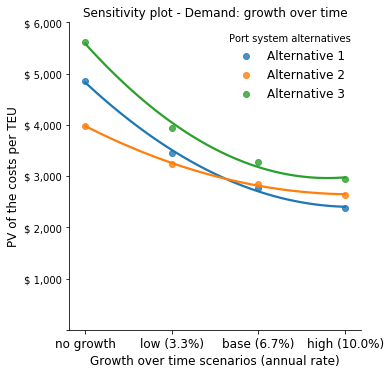

In [14]:
PVs = [['Alternative 1', 1000000, PV_alt1_12500_1000000_growth0 / 1000000], 
       ['Alternative 1', 1500000, PV_alt1_12500_1000000_growth1 / 1500000], 
       ['Alternative 1', 2000000, PV_alt1_12500_1000000_growth2 / 2000000],
       ['Alternative 1', 2500000, PV_alt1_12500_1000000_growth3 / 2500000],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000_growth0 / 1000000], 
       ['Alternative 2', 1500000, PV_alt2_40_12500_1000000_growth1 / 1500000], 
       ['Alternative 2', 2000000, PV_alt2_40_12500_1000000_growth2 / 2000000],
       ['Alternative 2', 2500000, PV_alt2_40_12500_1000000_growth3 / 2500000],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000_growth0 / 1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1000000_growth1 / 1500000], 
       ['Alternative 3', 2000000, PV_alt3_40_12500_1000000_growth2 / 2000000],
       ['Alternative 3', 2500000, PV_alt3_40_12500_1000000_growth3 / 2500000]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative','Demand', 'PV per TEU']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

# plot
sns.lmplot(x="Demand", y="PV per TEU", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)  # confidence interval

plt.title('Sensitivity plot - Demand: growth over time', fontsize='large')
plt.xlabel('Growth over time scenarios (annual rate)', fontsize='large')
plt.ylabel('PV of the costs per TEU', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')

plt.yticks(np.arange(0, 7*10**3, step = 1*10**3), 
           ["","$ 1,000","$ 2,000","$ 3,000","$ 4,000","$ 5,000","$ 6,000"])
plt.xticks([1000000, 1500000, 2000000, 2500000], 
           ["no growth", "low (3.3%)", "base (6.7%)", "high (10.0%)"], size='large')

# save fig
plt.savefig("SaveFigures/sensitivity_demand_growth_2.png", bbox_inches = 'tight')

## Sensitivity: Bathymetry

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
gentle,"$ 6,244","$ 4,322","$ 5,698"
average,"$ 4,850","$ 3,987","$ 5,621"
steep,"$ 3,414","$ 4,248","$ 5,411"


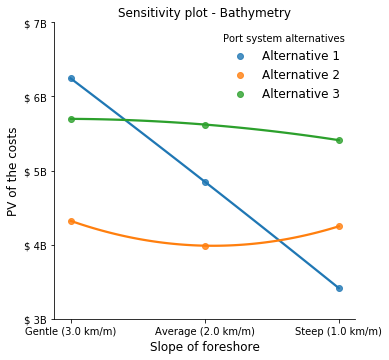

In [15]:
## Sensitivity: Slope
%store -r PV_alt1_12500_1000000_slope1
%store -r PV_alt1_12500_1000000_slope2
%store -r PV_alt1_12500_1000000_slope3

%store -r PV_alt2_40_12500_1000000_slope1
%store -r PV_alt2_40_12500_1000000_slope2
%store -r PV_alt2_40_12500_1000000_slope3

%store -r PV_alt3_40_12500_1000000_slope1
%store -r PV_alt3_40_12500_1000000_slope2
%store -r PV_alt3_40_12500_1000000_slope3

PVs = [['Alternative 1', 1.0, PV_alt1_12500_1000000_slope1],
       ['Alternative 1', 2.0, PV_alt1_12500_1000000_slope2],
       ['Alternative 1', 3.0, PV_alt1_12500_1000000_slope3],
       ['Alternative 2', 1.0, PV_alt2_40_12500_1000000_slope1],
       ['Alternative 2', 2.0, PV_alt2_40_12500_1000000_slope2],
       ['Alternative 2', 3.0, PV_alt2_40_12500_1000000_slope3],
       ['Alternative 3', 1.0, PV_alt3_40_12500_1000000_slope1],
       ['Alternative 3', 2.0, PV_alt3_40_12500_1000000_slope2],
       ['Alternative 3', 3.0, PV_alt3_40_12500_1000000_slope3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Slope', 'PV']) 
# display(PV_df)

# plot
sns.lmplot(x="Slope", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

# labels
plt.title('Sensitivity plot - Bathymetry', fontsize='large')
plt.xlabel('Slope of foreshore', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')
# label_point(PV_df.Slope, PV_df.PV, PV_df.PV, plt.gca(), 'black') 

# ticks
plt.yticks(np.arange(3*10**9, 8*10**9, step = 10**9), 
           ["$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"])
plt.xticks([1.0, 2.0, 3.0], 
           ["Gentle (3.0 km/m)","Average (2.0 km/m)","Steep (1.0 km/m)"])

def slope_scenario_table(df_):
    df = pd.DataFrame(index=['gentle', 'average', 'steep'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:3]/10**6)
    df['Alt 2'] = list(df_.PV[3:6]/10**6)
    df['Alt 3'] = list(df_.PV[6:9]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_slope = slope_scenario_table(PV_df)
display(df_slope)

# save fig
plt.savefig("SaveFigures/sensitivity_bathymetry.png", bbox_inches = 'tight')

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
0.50,"$ 4,850","$ 3,987","$ 5,621"
0.70,"$ 6,244","$ 4,015","$ 5,355"
0.90,"$ 7,659","$ 4,042","$ 5,355"


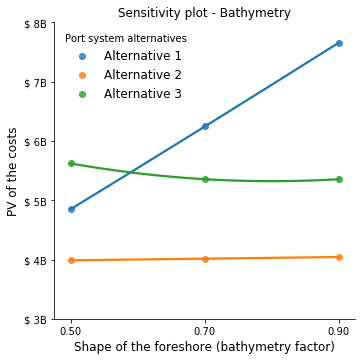

In [16]:
## Sensitivity: Bathymetry factor (shape of the foreshore)
%store -r PV_alt1_12500_1000000_bathymetry50
%store -r PV_alt1_12500_1000000_bathymetry75
%store -r PV_alt1_12500_1000000_bathymetry100

%store -r PV_alt2_12500_1000000_bathymetry50
%store -r PV_alt2_12500_1000000_bathymetry75
%store -r PV_alt2_12500_1000000_bathymetry100

%store -r PV_alt3_12500_1000000_bathymetry50
%store -r PV_alt3_12500_1000000_bathymetry75
%store -r PV_alt3_12500_1000000_bathymetry100


PVs = [['Alternative 1', 1.0, PV_alt1_12500_1000000_bathymetry50],
       ['Alternative 1', 2.0, PV_alt1_12500_1000000_bathymetry75],
       ['Alternative 1', 3.0, PV_alt1_12500_1000000_bathymetry100],
       ['Alternative 2', 1.0, PV_alt2_12500_1000000_bathymetry50],
       ['Alternative 2', 2.0, PV_alt2_12500_1000000_bathymetry75],
       ['Alternative 2', 3.0, PV_alt2_12500_1000000_bathymetry100],
       ['Alternative 3', 1.0, PV_alt3_12500_1000000_bathymetry50],
       ['Alternative 3', 2.0, PV_alt3_12500_1000000_bathymetry75],
       ['Alternative 3', 3.0, PV_alt3_12500_1000000_bathymetry100]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Bathymetry', 'PV']) 
# display(PV_df)

# plot
sns.lmplot(x="Bathymetry", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

# labels
plt.title('Sensitivity plot - Bathymetry', fontsize='large')
plt.xlabel('Shape of the foreshore (bathymetry factor)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Port system alternatives')

# ticks
plt.yticks(np.arange(3*10**9, 9*10**9, step = 10**9), 
           ["$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B", "$ 8B"])
plt.xticks([1.0, 2.0, 3.0], 
           ["0.50","0.70","0.90"]) 

def shape_scenario_table(df_):
    df = pd.DataFrame(index=['0.50', '0.70', '0.90'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:3]/10**6)
    df['Alt 2'] = list(df_.PV[3:6]/10**6)
    df['Alt 3'] = list(df_.PV[6:9]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_shape = shape_scenario_table(PV_df)
display(df_shape)

# save fig
plt.savefig("SaveFigures/sensitivity_bathymetry_factor.png", bbox_inches = 'tight')

## Sensitivity: Hinterland

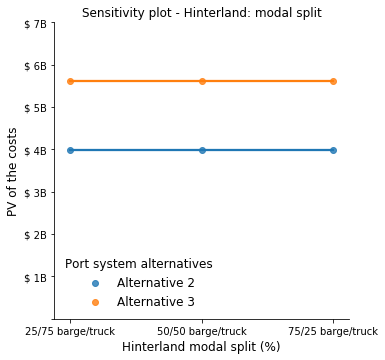

In [17]:
## Sensitivity: Hinterland

PV_alt2_40_12500_1000000_hinterland1 = PV_alt2_40_12500_1000000
PV_alt2_40_12500_1000000_hinterland2 = PV_alt2_40_12500_1000000
PV_alt2_40_12500_1000000_hinterland3 = PV_alt2_40_12500_1000000

PV_alt3_40_12500_1000000_hinterland1 = PV_alt3_40_12500_1000000 
PV_alt3_40_12500_1000000_hinterland2 = PV_alt3_40_12500_1000000
PV_alt3_40_12500_1000000_hinterland3 = PV_alt3_40_12500_1000000

PVs = [['Alternative 2', 1.0, PV_alt2_40_12500_1000000_hinterland1],
       ['Alternative 2', 2.0, PV_alt2_40_12500_1000000_hinterland2],
       ['Alternative 2', 3.0, PV_alt2_40_12500_1000000_hinterland3],
       ['Alternative 3', 1.0, PV_alt3_40_12500_1000000_hinterland1],
       ['Alternative 3', 2.0, PV_alt3_40_12500_1000000_hinterland2],
       ['Alternative 3', 3.0, PV_alt3_40_12500_1000000_hinterland3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Hinterland', 'PV']) 

sns.lmplot(x="Hinterland", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

# labels
plt.title('Sensitivity plot - Hinterland: modal split', fontsize='large')
plt.xlabel('Hinterland modal split (%)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title_fontsize='large', title='Port system alternatives')

# ticks
plt.yticks(np.arange(0, 8*10**9, step = 10**9),
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"])
plt.xticks([1.0, 2.0, 3.0], 
           ["25/75 barge/truck","50/50 barge/truck","75/25 barge/truck"])

# save fig
plt.savefig("SaveFigures/sensitivity_hinterland.png", bbox_inches = 'tight')

## Pie charts

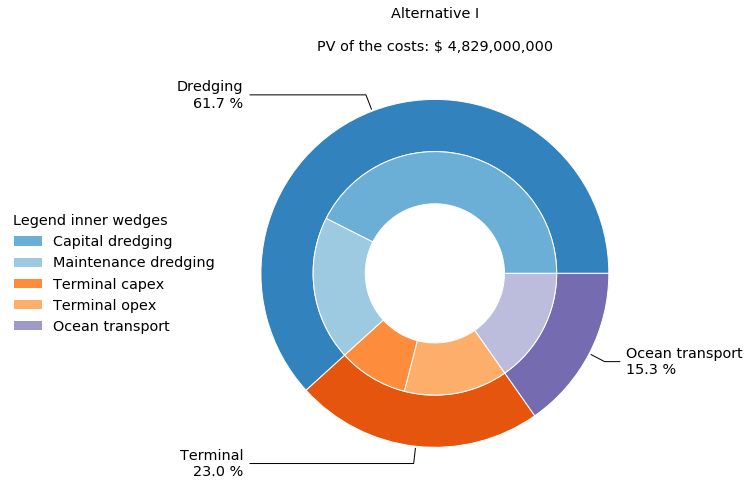

In [18]:
# Alternative I
onshore_capex        = 4.464402e+08
onshore_opex         = 6.644885e+08
capital_dredging     = 2.054873e+09
maintenance_dredging = 9.260763e+08
ocean_transport      = 7.370249e+08

dredging = [capital_dredging, maintenance_dredging]
terminal = [onshore_capex, onshore_opex]
other = [0, ocean_transport]

total = sum(dredging) + sum(terminal) + sum(other)
percentages = [sum(dredging)/total*100, sum(terminal)/total*100, sum(other)/total*100]
total = 4_829_000_000

# for i in range(len(percentages)):
#     print("{:.1f} %".format(percentages[i]))
    
fig, ax = plt.subplots(figsize=(8,8)) 

size = 0.3
vals = np.array([dredging, terminal, other])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 4, 12, 16]))
inner_colors = cmap(np.array([1, 2, 5, 6, 13, 14, 17, 18]))

outer_wedges, texts = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                             wedgeprops=dict(width=size, edgecolor='w'))
inner_wedges, texts = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                             wedgeprops=dict(width=size, edgecolor='w'))

outer_labels = ["Dredging", "Terminal", "Ocean transport"]
inner_labels = ["Capital dredging", "Maintenance dredging", "Terminal capex", "Terminal opex","Ocean transport"]

def label(label):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(outer_wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate("{}\n{:.1f} %".format(outer_labels[i],percentages[i]), xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                    horizontalalignment=horizontalalignment, fontsize='x-large', **kw)

    ax.legend(inner_wedges, inner_labels,
              title="Legend inner wedges          ",
              title_fontsize='x-large',
              fontsize='x-large',
              loc="center left",
              framealpha=False,
              bbox_to_anchor=(-0.5, 0, 0.5, 1))
    
    ax.set(aspect="equal")
    ax.set_title(label="{}\n\nPV of the costs: $ {:,.0f}".format(label, total), fontsize='x-large')
    
label('Alternative I')

fig.savefig("SaveFigures/pie_1.png", bbox_inches = 'tight')

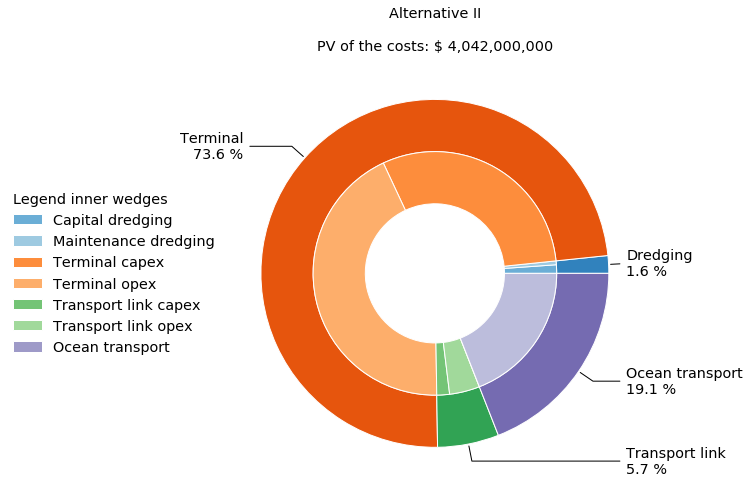

In [19]:
# Alternative II: 1,000,000
reclamation          = 1.459201e+08
offshore_capex       = 5.831483e+08
offshore_opex        = 6.770936e+08
onshore_capex        = 4.439461e+08
onshore_opex         = 9.974813e+08
barge_capex          = 6.544755e+07
barge_opex           = 1.551422e+08
capital_dredging     = 4.364091e+07
maintenance_dredging = 1.966779e+07
ocean_transport      = 7.370249e+08

dredging = [capital_dredging, maintenance_dredging]
terminal = [reclamation + offshore_capex + onshore_capex, offshore_opex + onshore_opex]
link = [barge_capex, barge_opex]
other = [0, ocean_transport]

total = sum(dredging) + sum(terminal) + sum(link) + sum(other)
percentages = [sum(dredging)/total*100, sum(terminal)/total*100, sum(link)/total*100, sum(other)/total*100]
total = 4_042_000_000

fig, ax = plt.subplots(figsize=(8,8)) 

size = 0.3
vals = np.array([dredging, terminal, link, other])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 4, 8, 12, 16]))
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

outer_wedges, texts = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
inner_wedges, texts = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

outer_labels = ["Dredging", "Terminal", "Transport link", "Ocean transport"]
inner_labels = ["Capital dredging", "Maintenance dredging", "Terminal capex", "Terminal opex",
                "Transport link capex", "Transport link opex", "Ocean transport"]

label('Alternative II')

fig.savefig("SaveFigures/pie_2.png", bbox_inches = 'tight')

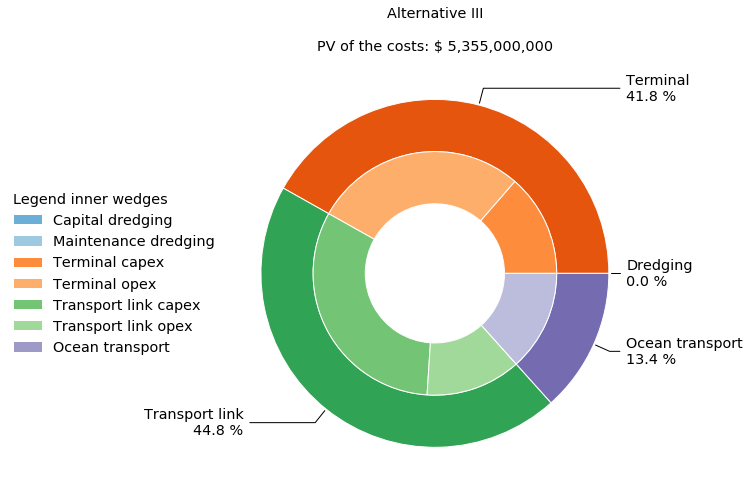

In [20]:
# Alternative III
reclamation          = 1.227424e+08
offshore_capex       = 3.388077e+08
offshore_opex        = 6.062653e+08
onshore_capex        = 2.894622e+08
onshore_opex         = 9.512976e+08
truck_capex          = 3.880654e+07
truck_opex           = 1.580181e+08
capital_dredging     = 0.1
maintenance_dredging = 0.1
bridge_capex         = 1.733575e+09
bridge_opex          = 5.404849e+08
ocean_transport      = 7.370249e+08

dredging = [capital_dredging, maintenance_dredging]
terminal = [reclamation + offshore_capex + onshore_capex, offshore_opex + onshore_opex]
link = [bridge_capex + truck_capex, bridge_opex + truck_opex]
other = [0, ocean_transport]

total = sum(dredging) + sum(terminal) + sum(link) + sum(other)
percentages = [sum(dredging)/total*100, sum(terminal)/total*100, sum(link)/total*100, sum(other)/total*100]
total = 5_355_000_000

labels = [int(capital_dredging + maintenance_dredging)/10**6, 
         int(reclamation + offshore_capex + onshore_capex + offshore_opex + onshore_opex)/10**6, 
         int(bridge_capex + truck_capex + bridge_opex + truck_opex)/10**6, 
         int(ocean_transport)/10**6]

fig, ax = plt.subplots(figsize=(8,8)) 

size = 0.3
vals = np.array([dredging, terminal, link, other])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 4, 8, 12, 16]))
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

outer_wedges, texts = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                             labeldistance=size, wedgeprops=dict(width=size, edgecolor='w'))
inner_wedges, texts = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                             wedgeprops=dict(width=size, edgecolor='w'))

outer_labels = ["Dredging", "Terminal", "Transport link", "Ocean transport"]
inner_labels = ["Capital dredging", "Maintenance dredging", "Terminal capex", "Terminal opex",
                "Transport link capex", "Transport link opex", "Ocean transport"]

label('Alternative III')

fig.savefig("SaveFigures/pie_3.png", bbox_inches = 'tight')

In [21]:
labels = ['$ {:,.0f}'.format(int(capital_dredging + maintenance_dredging)/10**6), 
          '$ {:,.0f}'.format(int(reclamation + offshore_capex + onshore_capex + offshore_opex + onshore_opex)/10**6), 
          '$ {:,.0f}'.format(int(bridge_capex + truck_capex + bridge_opex + truck_opex)/10**6), 
          '$ {:,.0f}'.format(int(ocean_transport)/10**6)]

# print(labels)

In [25]:
# # Alternative II: 1,500,000
# reclamation          = 1.935666e+08
# offshore_capex       = 8.952646e+08
# offshore_opex        = 1.049311e+09 
# onshore_capex        = 7.172933e+08
# onshore_opex         = 1.554555e+09
# barge_capex          = 1.000962e+08
# barge_opex           = 2.372763e+08
# capital_dredging     = 4.364091e+07
# maintenance_dredging = 1.966779e+07
# ocean_transport      = 1.105537e+09

# dredging = [capital_dredging, maintenance_dredging]
# terminal = [reclamation + offshore_capex + onshore_capex, offshore_opex + onshore_opex]
# link = [barge_capex, barge_opex]
# other = [0, ocean_transport]

# total = sum(dredging) + sum(terminal) + sum(link) + sum(other)
# percentages = [sum(dredging)/total*100, sum(terminal)/total*100, sum(link)/total*100, sum(other)/total*100]
# total = 6_058_000_000

# fig, ax = plt.subplots(figsize=(8,8)) 

# size = 0.3
# vals = np.array([dredging, terminal, link, other])

# cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.array([0, 4, 8, 12, 16]))
# inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

# outer_wedges, texts = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))
# inner_wedges, texts = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

# outer_labels = ["Dredging", "Terminal", "Transport link", "Ocean transport"]
# inner_labels = ["Capital dredging", "Maintenance dredging", "Terminal capex", "Terminal opex",
#                 "Transport link capex", "Transport link opex", "Ocean transport"]

# label('Alternative II')

# fig.savefig("SaveFigures/pie_2b.png", bbox_inches = 'tight')

In [276]:
cmap = plt.get_cmap("tab20")
dredging = cmap(np.array([0, 1]))
terminal = cmap(np.array([2, 3]))
link____ = cmap(np.array([4, 5]))
ocean___ = cmap(np.array([8, 9]))
color = cmap(np.array([0, 1, 2, 3, 4, 5]))

In [277]:
labels = ["Capital dredging", "Maintenance dredging", 
          "Terminal capex", "Terminal opex",
          "Transport link capex", "Transport link opex", 
          "Ocean transport"]

values_1a = [40,20,0,0,10,10]
bottom_1a = [0] + list(np.cumsum(values_1a))

values_2a = [2,2,30,40,2.5,2.5]
bottom_2a = [0] + list(np.cumsum(values_2a))

values_2b = [2,2,27.5,40,5,5]
bottom_2b = [0] + list(np.cumsum(values_2b))

values_2c = [2,2,25,40,7.5,7.5]
bottom_2c = [0] + list(np.cumsum(values_2c))

values_3a = [0,0,15,25,25,20]
bottom_3a = [0] + list(np.cumsum(values_3a))

values_3b = [0,0,15,25,30,22.5]
bottom_3b = [0] + list(np.cumsum(values_3b))

values_3c = [0,0,15,25,35,25]
bottom_3c = [0] + list(np.cumsum(values_3c))

In [390]:
def grouped_stack_costs(width=0.25, alpha=0.6):

    fig, ax = plt.subplots(figsize=(10, 10))
    
    alt_1 = [0]
    alt_2 = [1]
    alt_3 = [2]
 
    for i in range(len(values_1a)):
        bar = ax.bar([x + 0 * width for x in alt_1], values_1a[i], width=width, color=color[i], edgecolor='w', bottom=bottom_1a[i], label=labels[i])
        
    for i in range(len(values_2a)):
        bar = ax.bar([x - 1 * width for x in alt_2], values_2a[i], width=width, color=color[i], edgecolor='w', bottom=bottom_2a[i])
        bar = ax.bar([x + 0 * width for x in alt_2], values_2b[i], width=width, color=color[i], edgecolor='w', bottom=bottom_2b[i])
        bar = ax.bar([x + 1 * width for x in alt_2], values_2c[i], width=width, color=color[i], edgecolor='w', bottom=bottom_2c[i])
        
    for i in range(len(values_2a)):
        bar = ax.bar([x - 1 * width for x in alt_3], values_3a[i], width=width, color=color[i], edgecolor='w', bottom=bottom_3a[i])
        bar = ax.bar([x + 0 * width for x in alt_3], values_3b[i], width=width, color=color[i], edgecolor='w', bottom=bottom_3b[i])
        bar = ax.bar([x + 1 * width for x in alt_3], values_3c[i], width=width, color=color[i], edgecolor='w', bottom=bottom_3c[i])
        
    for group in [0, 1, 2]:
        label = list(["Onshore", "Offshore-Onshore\nBarge", "Offshore-Onshore\nBridge"])
        
        ax.text(group, 105, label[group], fontsize='large',
                verticalalignment="center", horizontalalignment="center")
        
    plt.title("Stacked cost estimates", fontsize='large', y=1.05)
    plt.xlabel("Offshore-onshore distance [km]", fontsize='large')
    plt.yticks(np.arange(0,120,120/7), ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B"])
    plt.xticks([1-width,1,1+width, 2-width, 2, 2+width], ["20 km", "40 km", "60 km", "20 km", "40 km", "60 km"], fontsize='large')
    plt.legend(fontsize='large', bbox_to_anchor=(1.0, 0.6), frameon=False)

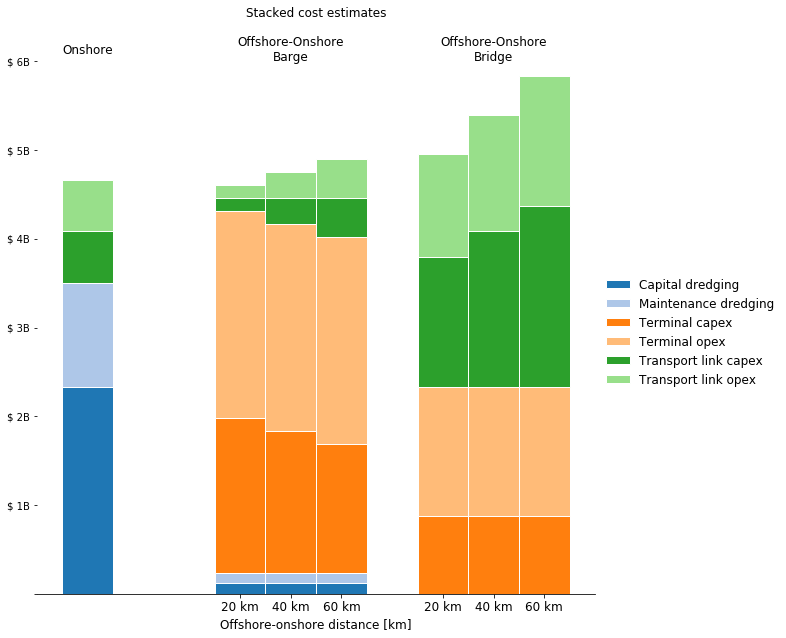

In [392]:
grouped_stack_costs()
sns.despine(left=True)